<center><img src = "https://littleml.files.wordpress.com/2017/03/pizarra-boosted_trees.png" alt = "Boosted trees"/></center>



For this lab we are about to work on the famous [Boston data set](https://scikit-learn.org/0.19/modules/generated/sklearn.datasets.load_boston.html). Make sure you get familiarized with it before starting! 

As usual, it is good practice to split your data set into training and test sets. (no validation set here to simplify).

In [22]:
## insert code
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X=pd.DataFrame(data)
y=pd.DataFrame(target)

In [7]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Gradient Boosting  with scikit-learn

Let's try to fit a gradient boosting regressor model whose weak regressors are regression trees.

> Fit a gradient boosting regressor on the Boston data set. Be sure to make sense of each argument of the [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) function.

In [38]:
## insert code
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
gbr= GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,max_depth=3)
gbr.fit(X_train,y_train)
predictions = gbr.predict(X_test)

C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


> Give description of each parameter here.

+
+
+
+
...

> Compute the mean squared error on the test test and the [coefficient of determination](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination) for the fitted model on the test dataset.

In [39]:
r2=r2_score(y_test,predictions)
print("Le R2_score fait "+str(r2))
MSE=mean_squared_error(y_test,predictions)
print("Le MSE fait "+str(RMSE))

Le R2_score fait 0.9155398262189408
Le MSE fait 2.4611994988369235


> Some questions for you:
+ What does represent the number of iterations?
+ How the CPU load varies with the number of weak learners?
+ What are the impact of having a small/large learning rate?


Briefly, it is good practice to start with a (rather) large learning rate with a limited number of weak learners to fine tune hyperparameters and, next, decrease it (with eventually a larger number of weak learners)

> Plot the evolution of the loss  for both the training and test sets as the number of weak learners increases. Comment.

In [30]:
## Insert code and comment
score=[]
mse=[]
train_mse=[]
train_score=[]
for i in range(5,400,10):
    gbr= GradientBoostingRegressor(learning_rate=0.1, n_estimators=i,max_depth=3)
    gbr.fit(X_train,y_train)
    train_predictions=gbr.predict(X_train)
    predictions = gbr.predict(X_test)
    r2_train=r2_score(y_train,train_predictions)
    r2=r2_score(y_test,predictions)
    score.append(r2)
    train_score.append(r2_train)
    train_MSE=mean_squared_error(y_train,train_predictions)
    MSE=mean_squared_error(y_test,predictions)
    mse.append(MSE)
    train_mse.append(train_MSE)

C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passe

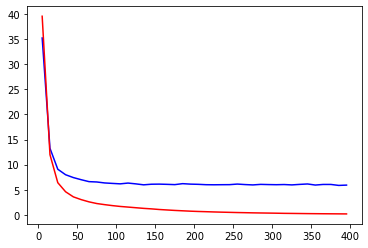

In [32]:
## insert code
plt.plot(range(5,400,10),mse,  "blue")
plt.plot(range(5,400,10),train_mse, "red")
plt.show()     

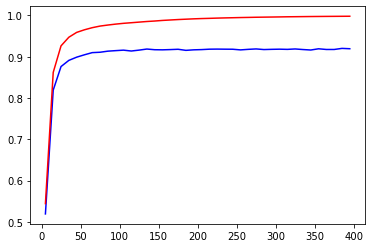

In [33]:
## insert code
plt.plot(range(5,400,10),score,  "blue")
plt.plot(range(5,400,10),train_score, "red")
plt.show()     

> Should we use early stopping? If not, explain why? If yes, what is the purpose of doing so?

Give answer.

> Plot the evolution of the mean squared error  with different learning rates. Comment.

In [34]:
##insert code
score1=[]
mse1=[]
train_mse1=[]
train_score1=[]
for i in range(1,200,5):
    gbr= GradientBoostingRegressor(learning_rate=0.01*i, n_estimators=100,max_depth=3)
    gbr.fit(X_train,y_train)
    train_predictions=gbr.predict(X_train)
    predictions = gbr.predict(X_test)
    r2_train=r2_score(y_train,train_predictions)
    r2=r2_score(y_test,predictions)
    score1.append(r2)
    train_score1.append(r2_train)
    train_MSE=mean_squared_error(y_train,train_predictions)
    MSE=mean_squared_error(y_test,predictions)
    mse1.append(MSE)
    train_mse1.append(train_MSE)

C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passe

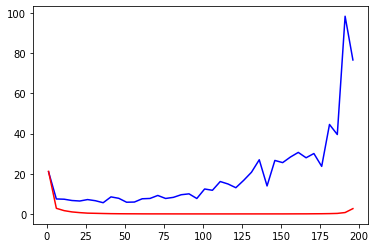

In [35]:
## insert code
plt.plot(range(1,200,5),mse1,  "blue")
plt.plot(range(1,200,5),train_mse1, "red")
plt.show()     

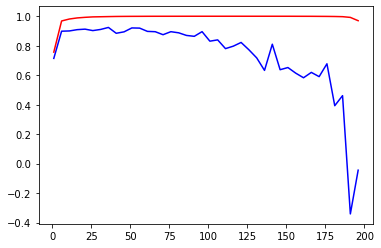

In [36]:
plt.plot(range(1,200,5),score1,  "blue")
plt.plot(range(1,200,5),train_score1, "red")
plt.show()     

An important stage in machine learning is to fine tune your model. 

> Keeping as fixed `n_estimators=1000` and `learning_rate=0.05`, perform a [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to set the `max_depth` and `min_samples_split` arguments. To do so, use cross validation on the training set (with 5 folds).

In [40]:
## Use the following possible setting for the two hyper-parameters
max_depth_values = [2,4,6,8] 
min_samples_split_values = [2,3,4]

## If you want to use parallelization to speed computations
import multiprocessing
multiprocessing.cpu_count()

4

In [43]:
## insert code
from sklearn.model_selection import GridSearchCV
# Définir une grille d'hyperparamètres à tester
GBRmodel = GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000)
param_grid = {
    'max_depth': [2,4,6,8] ,  # profondeur maximale de l'arbre
    'min_samples_split': [2,3,4],  # nombre minimum d'échantillons pour splitter un noeud
}
# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(GBRmodel, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Best hyperparameters for Decision Tree:", grid_search.best_params_)

C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passe

Best hyperparameters for Decision Tree: {'max_depth': 2, 'min_samples_split': 3}


In [45]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_split': 3}

> Once the above hyper-parameters fine tuned, reduce the learning rate and increase the number of weak learners to see if you can get better performances. (another grid search may be convenient)

In [44]:
## insert code
from sklearn.model_selection import GridSearchCV
# Définir une grille d'hyperparamètres à tester
GBRmodel1 = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1500)
param_grid = {
    'max_depth': [2,4,6,8] ,  # profondeur maximale de l'arbre
    'min_samples_split': [2,3,4],  # nombre minimum d'échantillons pour splitter un noeud
}
# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(GBRmodel1, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Best hyperparameters for Decision Tree:", grid_search.best_params_)

C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passe

Best hyperparameters for Decision Tree: {'max_depth': 4, 'min_samples_split': 3}


> Compute the $R^2$ and mean squared error on the test set for your best model.

In [46]:
## insert code
Bestmodel= GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000, max_depth=4, min_samples_split=3)
Bestmodel.fit(X_train,y_train)
predictions = Bestmodel.predict(X_test)
r2=r2_score(y_test,predictions)
print("Le R2_score fait "+str(r2))
MSE=mean_squared_error(y_test,predictions)
print("Le MSE fait "+str(RMSE))

C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Le R2_score fait 0.9130109468156239
Le MSE fait 2.4611994988369235


In [51]:
Bestmodel.estimators_[0][0].predict(X_test)

array([ -1.16448337,   4.70113977,  -6.36471647,  -1.16448337,
        -6.36471647,  -1.16448337,  -6.36471647,  -6.36471647,
        -1.16448337,  -1.16448337,  -6.36471647,  -6.36471647,
       -12.52085898,  -1.16448337,  -1.16448337,   9.83589778,
        -6.36471647, -12.52085898,  21.36136008,  -8.02510608,
        -1.16448337,  -1.16448337,  -6.36471647,   4.70113977,
        -8.02510608,  -8.02510608,  -1.16448337,  -8.02510608,
        -6.36471647,  -1.16448337,  -6.36471647,  -1.16448337,
        -8.69653465,  -1.16448337,  -6.36471647,  -6.36471647,
         9.83589778,  -1.16448337,  -1.57653465,  -1.16448337,
        -1.57653465,   4.70113977,  21.36136008,  -1.16448337,
        -1.16448337,  -8.02510608,  -6.36471647,  -1.16448337,
        -6.36471647,   4.70113977,  -1.16448337,   9.83589778,
        -6.36471647,   4.70113977,  21.36136008,  -1.16448337,
        -6.36471647,   4.70113977,  -1.16448337,  -1.57653465,
         4.70113977,   9.83589778,   4.70113977,  -1.16

> Since we use boosting trees, it is possible to get feature importance as for random forests. It is accessible using the `feature_importances_` property. Plot importances and comment.

In [52]:
## insert code
Bestmodel.feature_importances_

array([3.16485019e-02, 6.53880571e-04, 3.20968046e-03, 3.54698644e-04,
       2.10477304e-02, 4.65343340e-01, 1.40632653e-02, 7.46612537e-02,
       4.29011340e-03, 1.78826106e-02, 2.28927268e-02, 1.61600323e-02,
       3.27792166e-01])

##  2. Gradient boosting with XGboost

You may need to install the `xgboost` library before loading it.

Although other options are possible, we are about to use Xgboost with as weak learners trees.  Xgboost parameters, especially those for the `XGBRegressor()` and `XGBClassifier()` functions, are described in this [link](http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn). Fortunately it is very similar to that of the scikit-learn library.

> Fit a XGB regression model and gives its mean squared error and $R^2$ score.

In [56]:
## insert code

Fine tuning Xgboost stage is very similar to that for gradient boosting machine. Note that there two additional hyper-parameters to fine tune: `alpha` and `lambda` that drive regularization.

> Try to fine tune your Xgboost model.

In [23]:
## insert code

## 3. Optional: Adaboost and models comparison

Adaboost is implemented within scikit-learn with the [`AdaBoostClassifier()`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) and [`AdaBoostRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html) functions.

> Fit an Adaboost model (with fine tuning) and compare performances between your just fitted model and that for gradient boosting machine and Xgboost.

In [ ]:
## insert code